# **Práctica 4 - Algoritmos de Búsqueda Parte 1.**

#### **Dudas: Polinomio y Gráfica Espacial, Forma de la temporal**

## **Nodos**

In [411]:
import random
import matplotlib.pyplot as plt

class Node:
    def __init__(self, strName, intValue):
        self.name = strName
        self.value = intValue

    def __repr__(self):
        return f"{self.name} -> {self.value}"

def create_node_arr(size, type, low_limit, up_limit):
    arr = []
    i = 0
    while i < size:
        if type == 0:
            element = Node("Nodo " + str(i + 1), i + low_limit)
            arr.append(element)
        elif type == 1:
            element = Node("Nodo " + str(i + 1), up_limit - i)
            arr.append(element)
        elif type == 2:
            element = Node("Nodo " + str(i + 1), random.randint(low_limit, up_limit))
            arr.append(element)
        i += 1
    return arr

## **Búsqueda Lineal (Iterativa)**

### **Algoritmo**

In [412]:
def linear_search_iterative(arr, sought):
    time = 0
    i = 0
    n = len(arr)
    while i < n:
        time += 1
        if arr[i].value == sought:
            return i, time
        i += 1
    return -1, time

### **Prueba de Búsqueda Lineal (Iterativa)**

In [413]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
sought = random.randint(0, MAX)
index, time = linear_search_iterative(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 1 -> 20, Nodo 2 -> 19, Nodo 3 -> 18, Nodo 4 -> 17, Nodo 5 -> 16, Nodo 6 -> 15, Nodo 7 -> 14, Nodo 8 -> 13, Nodo 9 -> 12, Nodo 10 -> 11, Nodo 11 -> 10, Nodo 12 -> 9, Nodo 13 -> 8, Nodo 14 -> 7, Nodo 15 -> 6, Nodo 16 -> 5, Nodo 17 -> 4, Nodo 18 -> 3, Nodo 19 -> 2, Nodo 20 -> 1]
Nodo con el valor buscado 17 encontrado en la posición 3


### **Casos Búsqueda Lineal (Iterativa)**

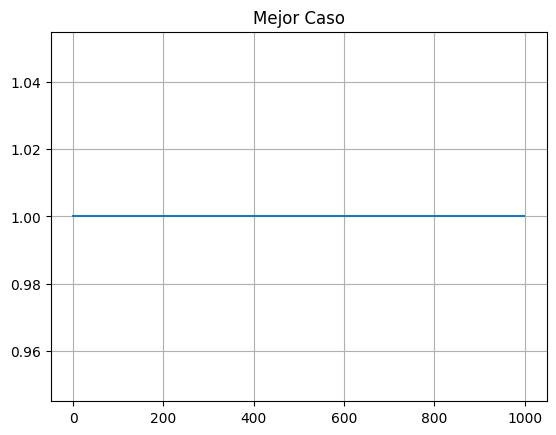

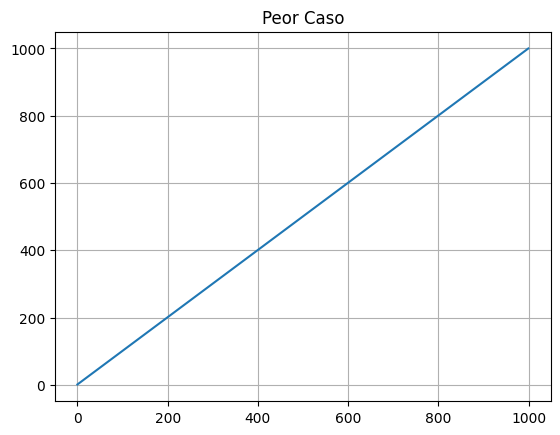

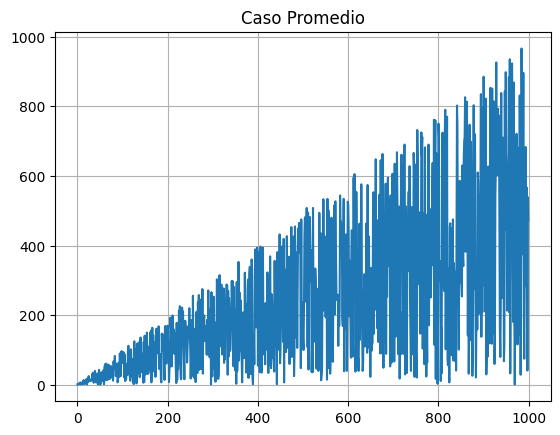

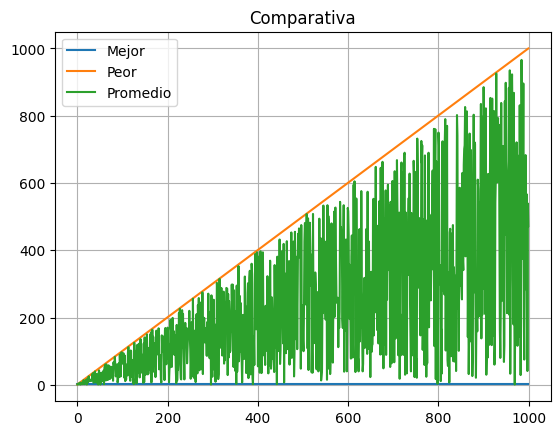

In [414]:
MAX = 1000
arr = create_node_arr(MAX, 0, 0, MAX)
x = []
y_mejor = []
y_peor = []
y_prom = []

for i in range(MAX):
    x.append(i)
    sought_mejor = 0
    index, time_mejor = linear_search_iterative(arr, sought_mejor)
    y_mejor.append(time_mejor)
    sought_peor = i
    index, time_peor = linear_search_iterative(arr, sought_peor)
    y_peor.append(time_peor)
    sought_prom = random.randint(0, i) if i > 0 else 0
    index, time_prom = linear_search_iterative(arr, sought_prom)
    y_prom.append(time_prom)

casos = [{"titulo": "Mejor Caso", "datos_y": y_mejor, "etiqueta": "Mejor"}, {"titulo": "Peor Caso", "datos_y": y_peor, "etiqueta": "Peor"}, {"titulo": "Caso Promedio", "datos_y": y_prom, "etiqueta": "Promedio"}]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(x, case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Comparativa")
for case in casos:
    plt.plot(x, case["datos_y"], label=case["etiqueta"])

plt.grid(True)
plt.legend()
plt.show()

## **Búsqueda Lineal (Recursiva)**

### **Algoritmo**

In [415]:
def linear_search_recursive(arr, sought, index, time):
    time += 1
    n = len(arr)
    if index >= n:
        return -1, time
    if arr[index].value == sought:
        return index, time
    return linear_search_recursive(arr, sought, index + 1, time)

def linear_search_recursive_inter(arr, sought):
    return linear_search_recursive(arr, sought, 0, 0)

### **Prueba de Búsqueda Lineal (Recursiva)**

In [416]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
print(arr)
sought = random.randint(0, MAX)
index, times = linear_search_recursive_inter(arr, sought)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 1 -> 20, Nodo 2 -> 19, Nodo 3 -> 18, Nodo 4 -> 17, Nodo 5 -> 16, Nodo 6 -> 15, Nodo 7 -> 14, Nodo 8 -> 13, Nodo 9 -> 12, Nodo 10 -> 11, Nodo 11 -> 10, Nodo 12 -> 9, Nodo 13 -> 8, Nodo 14 -> 7, Nodo 15 -> 6, Nodo 16 -> 5, Nodo 17 -> 4, Nodo 18 -> 3, Nodo 19 -> 2, Nodo 20 -> 1]
Nodo con el valor buscado 13 encontrado en la posición 7


### **Casos de Búsqueda Lineal (Recursiva)**

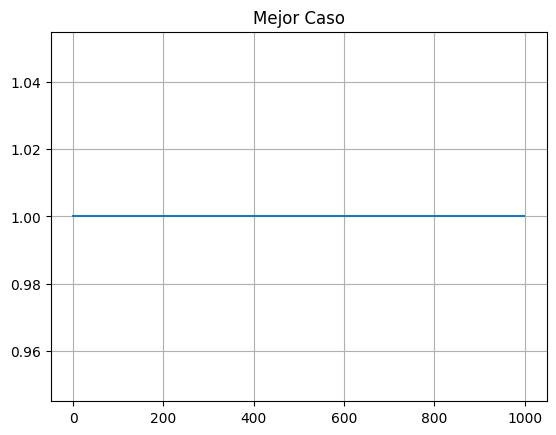

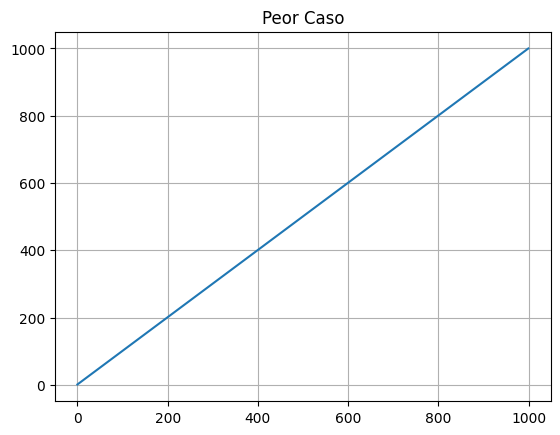

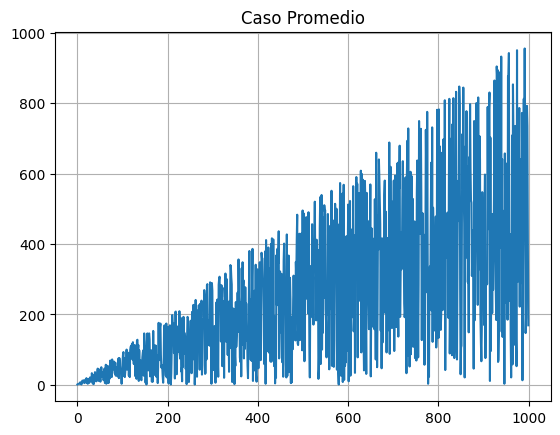

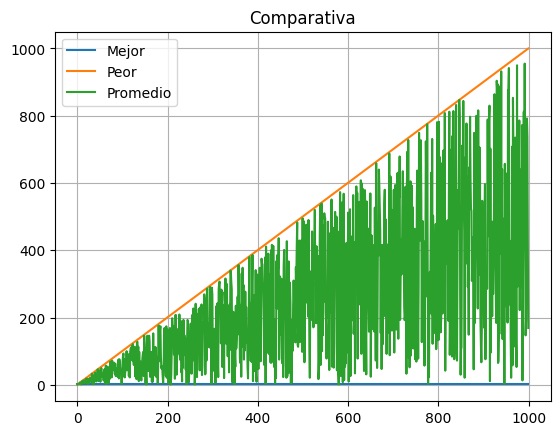

In [417]:
MAX = 1000
arr = create_node_arr(MAX, 0, 0, MAX)
x = []
y_mejor = []
y_peor = []
y_prom = []

for i in range(MAX):
    x.append(i)
    sought_mejor = 0 # <----------------------------
    index, time_mejor = linear_search_recursive_inter(arr, sought_mejor)
    y_mejor.append(time_mejor)
    sought_peor = i # <----------------------------
    index, time_peor = linear_search_recursive_inter(arr, sought_peor)
    y_peor.append(time_peor)
    sought_prom = random.randint(0, i) if i > 0 else 0 # <----------------------------
    index, time_prom = linear_search_recursive_inter(arr, sought_prom)
    y_prom.append(time_prom)

casos = [("Mejor Caso", y_mejor), ("Peor Caso", y_peor), ("Caso Promedio", y_prom)]

for titulo, datos_y in casos:
    plt.title(titulo)
    plt.plot(x, datos_y)
    plt.grid(True)
    plt.show()

plt.title("Comparativa")
plt.plot(x, y_mejor, label="Mejor")
plt.plot(x, y_peor, label="Peor")
plt.plot(x, y_prom, label="Promedio")
plt.grid(True)
plt.legend()
plt.show()

## **Búsqueda Binaria (Iterativa)**

### **Algoritmos**

In [418]:
def bubble_sort(arr):
    time = 0
    n = len(arr)
    i = 0
    while i < n:
        j = 0
        while j < n - i - 1:
            time += 1
            if arr[j].value > arr[j + 1].value:
                temp = arr[j]
                arr[j] = arr[j + 1]
                arr[j + 1] = temp
            j += 1
        i += 1
    return time

def merge_sort(arr):
    time = 0
    n = len(arr)
    if n > 1:
        mid = n // 2
        L = arr[:mid]
        R = arr[mid:]
        time += merge_sort(L)
        time += merge_sort(R)
        i = 0
        j = 0
        k = 0
        while i < len(L) and j < len(R):
            time += 1
            if L[i].value < R[j].value:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            time += 1
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            time += 1
            arr[k] = R[j]
            j += 1
            k += 1
    return time

def binary_search_iterative(arr, sought):
    time = 0
    low = 0
    high = len(arr) - 1
    while low <= high:
        time += 1
        mid = (low + high) // 2
        if arr[mid].value == sought:
            return mid, time
        elif arr[mid].value < sought:
            low = mid + 1
        else:
            high = mid - 1
    return -1, time

### **Prueba de Búsqueda Binaria (Iterativa) con Bubble Sort**

In [419]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
time = bubble_sort(arr)
sought = MAX // 2
index, time = binary_search_iterative(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 10 encontrado en la posición 9


### **Casos de Búsqueda Binaria (Iterativa) con Bubble Sort**

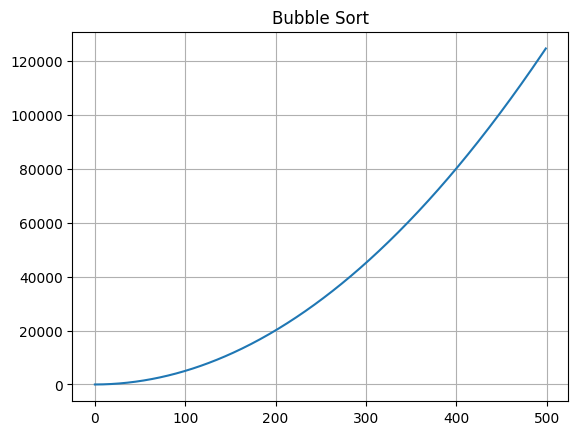

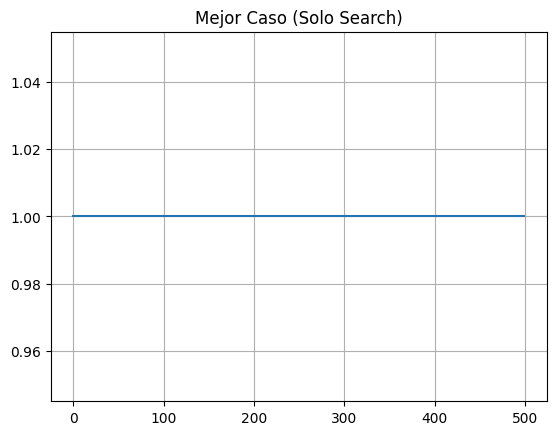

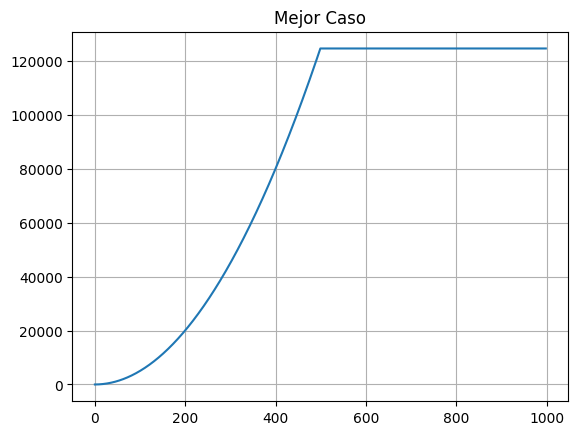

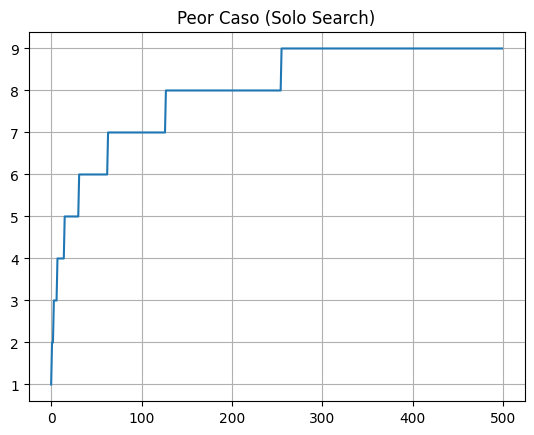

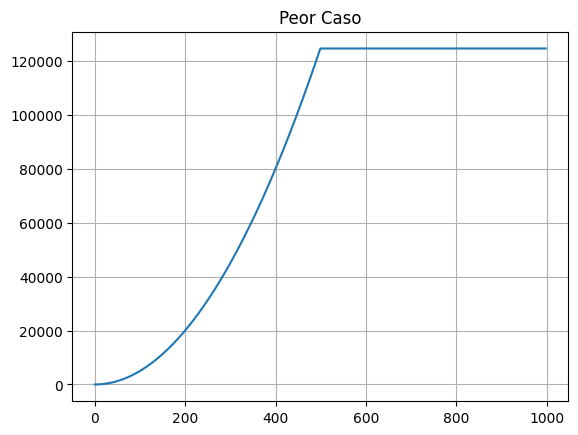

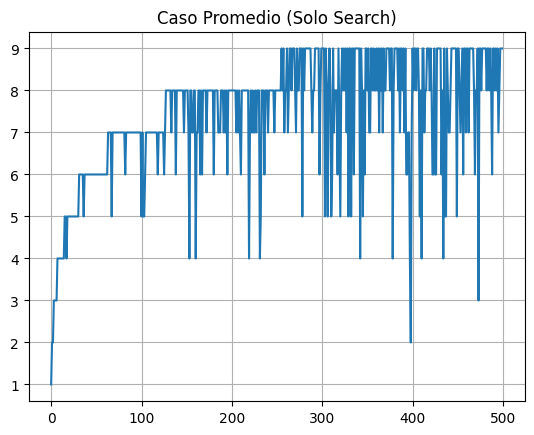

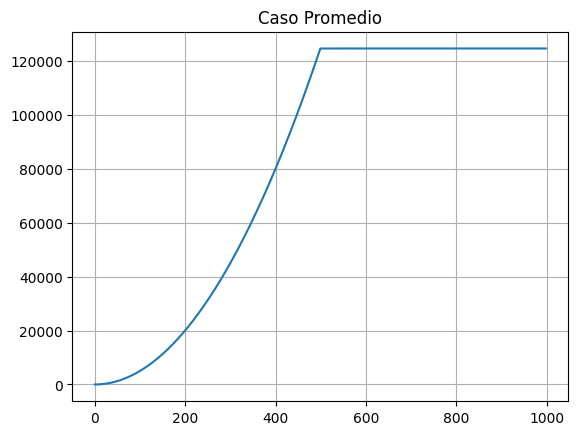

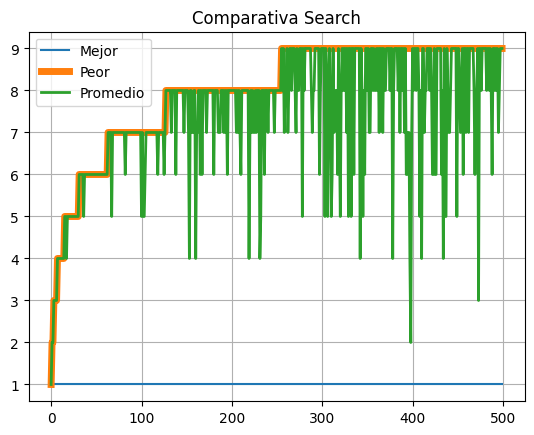

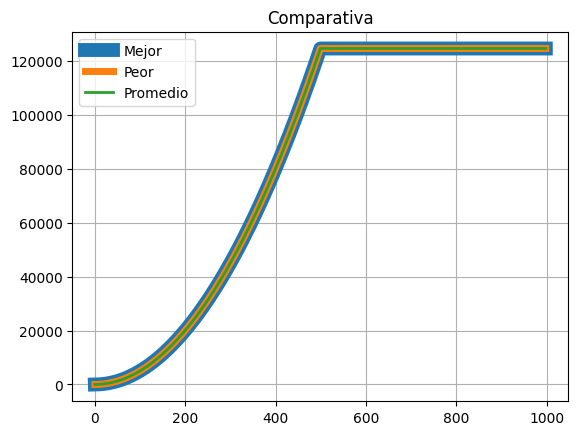

In [420]:
MAX = 500

x = []
x_sort = []
x_search = []

y_mejor = []
y_peor = []
y_prom = []

y_sort = []

y_search_mejor = []
y_search_peor = []
y_search_prom = []

arr = create_node_arr(MAX, 1, 0, MAX)
aux = []
aux_aux = []

for i in range(MAX):
    aux.append(arr[i])
    time_sort = bubble_sort(aux)
    y_sort.append(time_sort)
    x_sort.append(i)
x_last = i
y_last = time_sort

plt.title("Bubble Sort")
plt.plot(x_sort, y_sort)
plt.grid(True)
plt.show()

for i in range(MAX):
    aux_aux.append(aux[i])
    x_search.append(i)
    if not aux_aux: continue
    sought_mejor = aux_aux[i // 2].value # <--------------------
    index, time_search_mejor = binary_search_iterative(aux_aux, sought_mejor)
    sought_peor = MAX * 2 # <--------------------
    index, time_search_peor = binary_search_iterative(aux_aux, sought_peor)
    sought_prom = random.randint(0, MAX) # <--------------------
    index, time_search_prom = binary_search_iterative(aux_aux, sought_prom)
    y_search_mejor.append(time_search_mejor)
    y_search_peor.append(time_search_peor)
    y_search_prom.append(time_search_prom)

x = x_sort[:]
y_mejor = y_sort[:]
y_peor = y_sort[:]
y_prom = y_sort[:]

for i in range(MAX):
    x.append(x_last + x_search[i])
    y_mejor.append(y_last + y_search_mejor[i])
    y_peor.append(y_last + y_search_peor[i])
    y_prom.append(y_last + y_search_prom[i])

casos = [
    {"titulo": "Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor},
    {"titulo": "Mejor Caso", "datos_x": x, "datos_y": y_mejor},
    {"titulo": "Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor},
    {"titulo": "Peor Caso", "datos_x": x, "datos_y": y_peor},
    {"titulo": "Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom},
    {"titulo": "Caso Promedio", "datos_x": x, "datos_y": y_prom},
]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(case["datos_x"], case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Comparativa Search")
plt.plot(x_search, y_search_mejor, label="Mejor")
plt.plot(x_search, y_search_peor, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Comparativa")
plt.plot(x, y_mejor, label="Mejor", linewidth=10)
plt.plot(x, y_peor, label="Peor", linewidth=5)
plt.plot(x, y_prom, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

### **Prueba de Búsqueda Binaria (Iterativa) con Merge Sort**

In [421]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
time = merge_sort(arr)
sought = MAX // 2
index, time = binary_search_iterative(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 10 encontrado en la posición 9


### **Casos de Búsqueda Binaria (Iterativa) con Merge Sort**

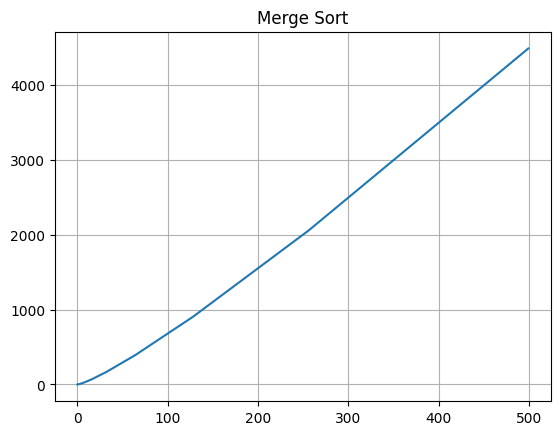

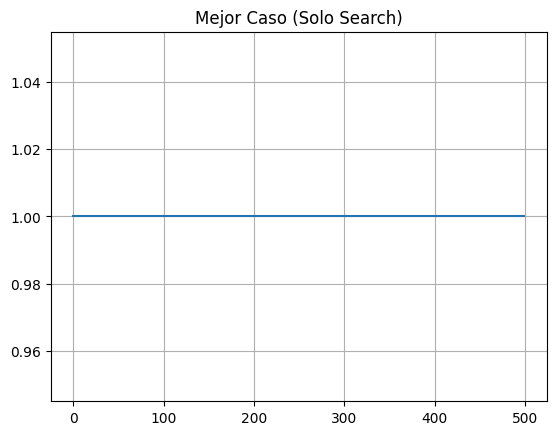

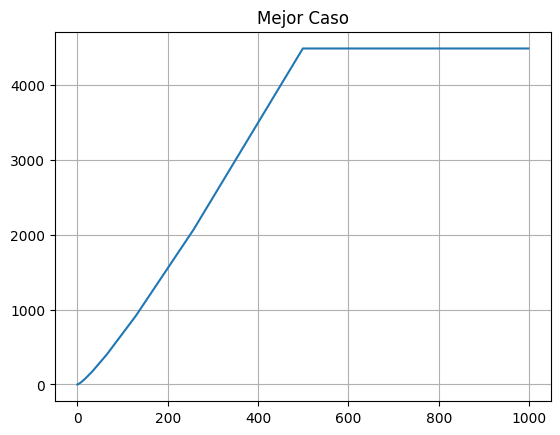

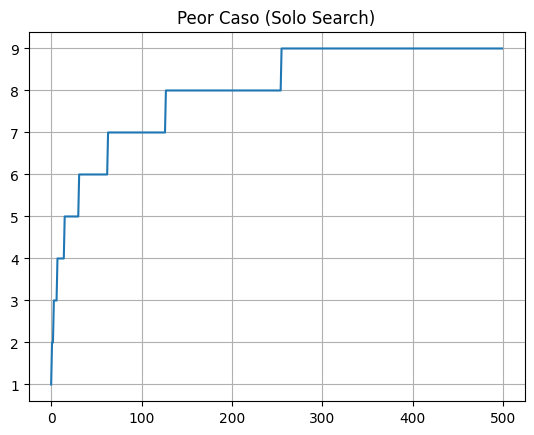

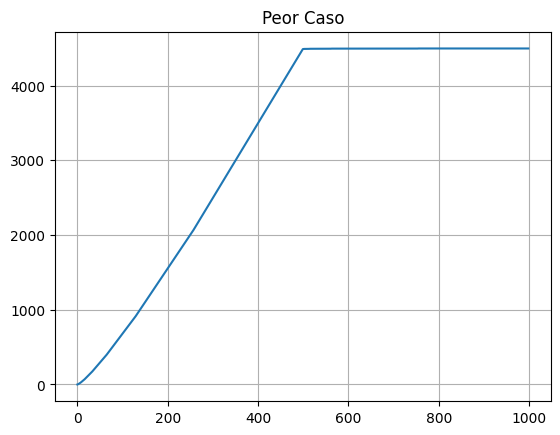

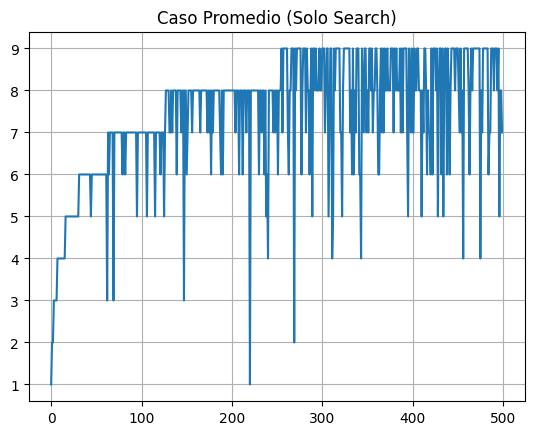

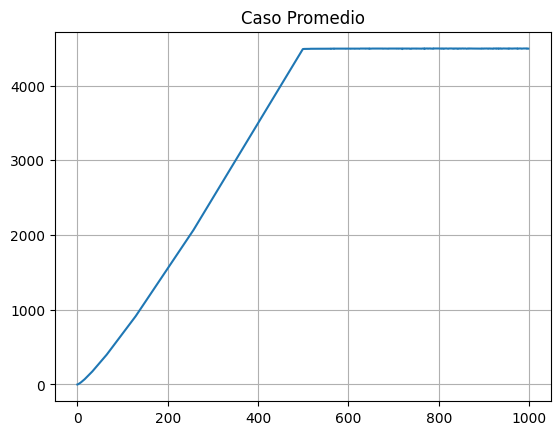

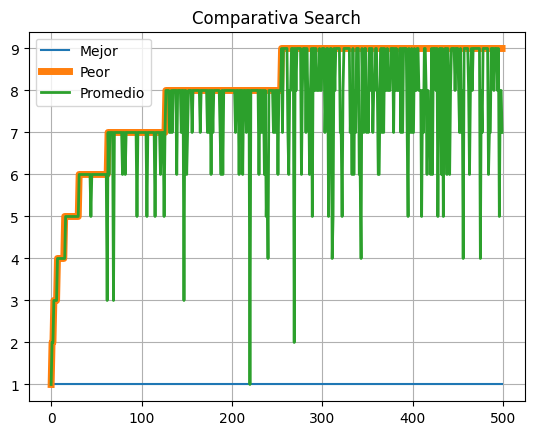

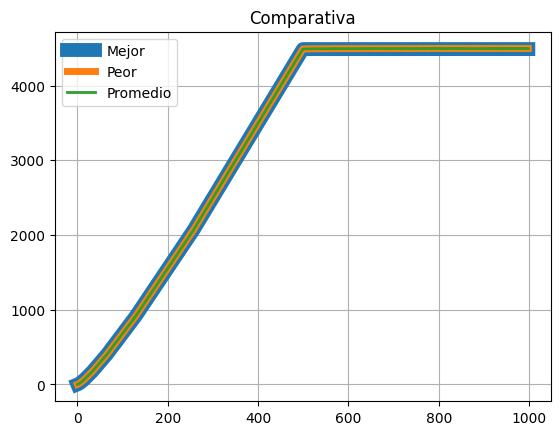

In [422]:
MAX = 500

x = []
x_sort = []
x_search = []

y_mejor = []
y_peor = []
y_prom = []

y_sort = []

y_search_mejor = []
y_search_peor = []
y_search_prom = []

arr = create_node_arr(MAX, 1, 0, MAX)
aux = []
aux_aux = []

for i in range(MAX):
    aux.append(arr[i])
    time_sort = merge_sort(aux)
    y_sort.append(time_sort)
    x_sort.append(i)
x_last = i
y_last = time_sort

plt.title("Merge Sort")
plt.plot(x_sort, y_sort)
plt.grid(True)
plt.show()

for i in range(MAX):
    aux_aux.append(aux[i])
    x_search.append(i)
    if not aux_aux: continue
    sought_mejor = aux_aux[i // 2].value # <--------------------
    index, time_search_mejor = binary_search_iterative(aux_aux, sought_mejor)
    sought_peor = MAX * 2 # <--------------------
    index, time_search_peor = binary_search_iterative(aux_aux, sought_peor)
    sought_prom = random.randint(0, MAX) # <--------------------
    index, time_search_prom = binary_search_iterative(aux_aux, sought_prom)
    y_search_mejor.append(time_search_mejor)
    y_search_peor.append(time_search_peor)
    y_search_prom.append(time_search_prom)

x = x_sort[:]
y_mejor = y_sort[:]
y_peor = y_sort[:]
y_prom = y_sort[:]

for i in range(MAX):
    x.append(x_last + x_search[i])
    y_mejor.append(y_last + y_search_mejor[i])
    y_peor.append(y_last + y_search_peor[i])
    y_prom.append(y_last + y_search_prom[i])

casos = [
    {"titulo": "Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor},
    {"titulo": "Mejor Caso", "datos_x": x, "datos_y": y_mejor},
    {"titulo": "Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor},
    {"titulo": "Peor Caso", "datos_x": x, "datos_y": y_peor},
    {"titulo": "Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom},
    {"titulo": "Caso Promedio", "datos_x": x, "datos_y": y_prom},
]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(case["datos_x"], case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Comparativa Search")
plt.plot(x_search, y_search_mejor, label="Mejor")
plt.plot(x_search, y_search_peor, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Comparativa")
plt.plot(x, y_mejor, label="Mejor", linewidth=10)
plt.plot(x, y_peor, label="Peor", linewidth=5)
plt.plot(x, y_prom, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

## **Búsqueda Binaria (Recursiva)**

### **Algoritmo**

In [423]:
def binary_search_recursive(arr, sought, low, high, time):
    time += 1
    if low > high:
        return -1, time
    mid = (low + high) // 2
    if arr[mid].value == sought:
        return mid, time
    elif arr[mid].value < sought:
        return binary_search_recursive(arr, sought, mid + 1, high, time)
    else:
        return binary_search_recursive(arr, sought, low, mid - 1, time)

### **Prueba de Búsqueda Binaria (Recursiva) con Bubble Sort**

In [424]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
time = bubble_sort(arr)
sought = random.randint(0, MAX)
index, time = binary_search_recursive(arr, sought, 0, len(arr) - 1, 0)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 7 encontrado en la posición 6


### **Casos de Búsqueda Binaria (Recursiva) con Bubble Sort**

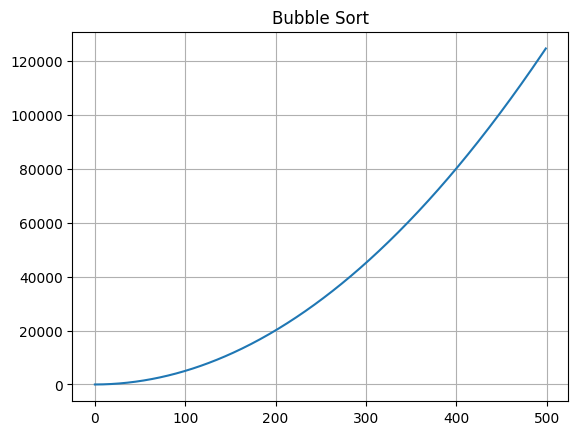

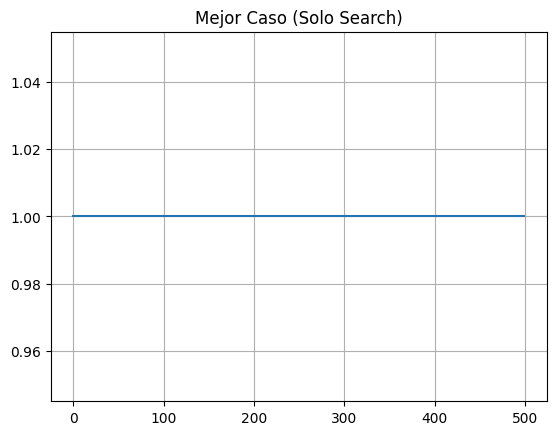

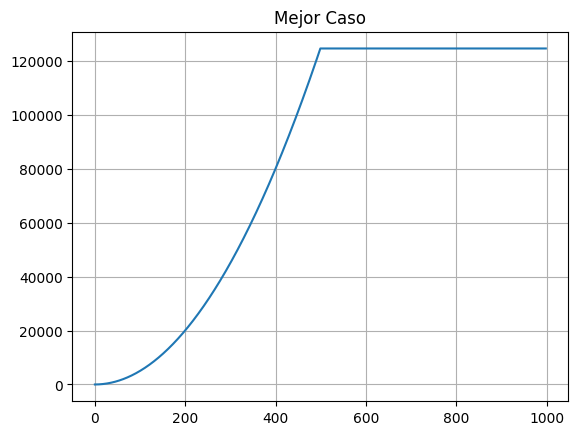

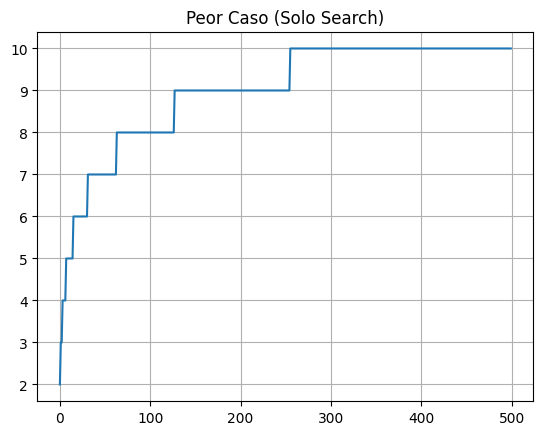

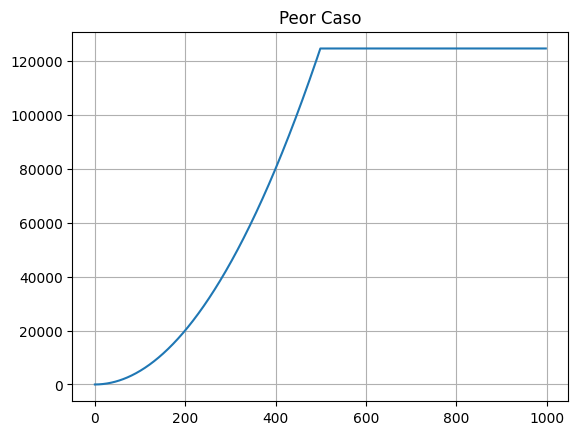

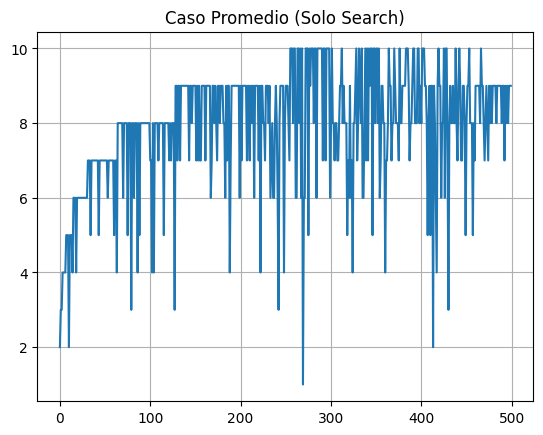

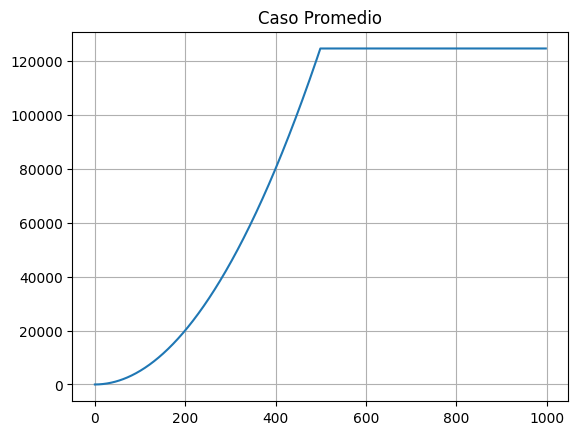

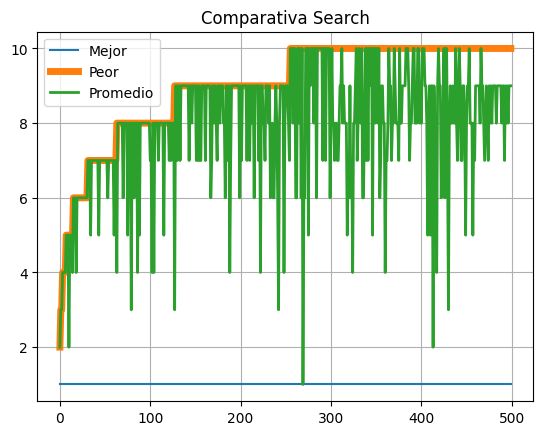

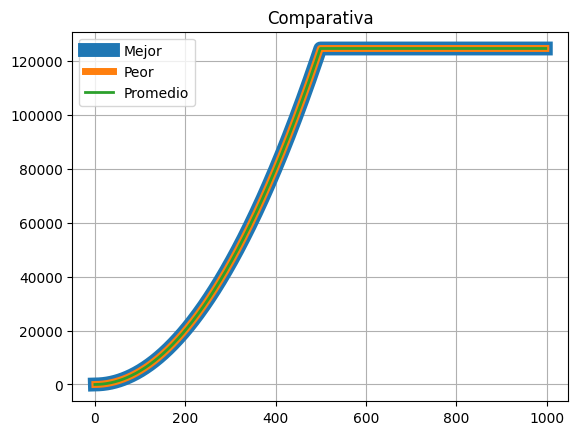

In [425]:
MAX = 500

arr = create_node_arr(MAX, 1, 0, MAX)
aux = []
aux_aux = []

x_sort = []
y_sort = []

x_search = []
y_search_mejor = []
y_search_peor = []
y_search_prom = []

for i in range(MAX):
    aux.append(arr[i])
    time_sort = bubble_sort(aux)
    y_sort.append(time_sort)
    x_sort.append(i)
x_last = i
y_last = time_sort

plt.title("Bubble Sort")
plt.plot(x_sort, y_sort)
plt.grid(True)
plt.show()

for i in range(MAX):
    aux_aux.append(aux[i])
    x_search.append(i)
    if not aux_aux: continue
    sought_mejor = aux_aux[i // 2].value # <--------------------
    index, time_search_mejor = binary_search_recursive(aux_aux, sought_mejor, 0, len(aux_aux) - 1, 0)
    sought_peor = MAX * 2 # <--------------------
    index, time_search_peor = binary_search_recursive(aux_aux, sought_peor, 0, len(aux_aux) - 1, 0)
    sought_prom = random.randint(0, MAX) # <--------------------
    index, time_search_prom = binary_search_recursive(aux_aux, sought_prom, 0, len(aux_aux) - 1, 0)
    y_search_mejor.append(time_search_mejor)
    y_search_peor.append(time_search_peor)
    y_search_prom.append(time_search_prom)

x = x_sort[:]
y_mejor = y_sort[:]
y_peor = y_sort[:]
y_prom = y_sort[:]

for i in range(MAX):
    x.append(x_last + x_search[i])
    y_mejor.append(y_last + y_search_mejor[i])
    y_peor.append(y_last + y_search_peor[i])
    y_prom.append(y_last + y_search_prom[i])

casos = [
    {"titulo": "Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor},
    {"titulo": "Mejor Caso", "datos_x": x, "datos_y": y_mejor},
    {"titulo": "Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor},
    {"titulo": "Peor Caso", "datos_x": x, "datos_y": y_peor},
    {"titulo": "Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom},
    {"titulo": "Caso Promedio", "datos_x": x, "datos_y": y_prom},
]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(case["datos_x"], case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Comparativa Search")
plt.plot(x_search, y_search_mejor, label="Mejor")
plt.plot(x_search, y_search_peor, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Comparativa")
plt.plot(x, y_mejor, label="Mejor", linewidth=10)
plt.plot(x, y_peor, label="Peor", linewidth=5)
plt.plot(x, y_prom, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

### **Prueba de Búsqueda Binaria (Recursiva) con Merge Sort**

In [426]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
time = merge_sort(arr)
sought = random.randint(0, MAX)
index, time = binary_search_recursive(arr, sought, 0, len(arr) - 1, 0)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 3 encontrado en la posición 2


### **Casos de Búsqueda Binaria (Recursiva) con Merge Sort**

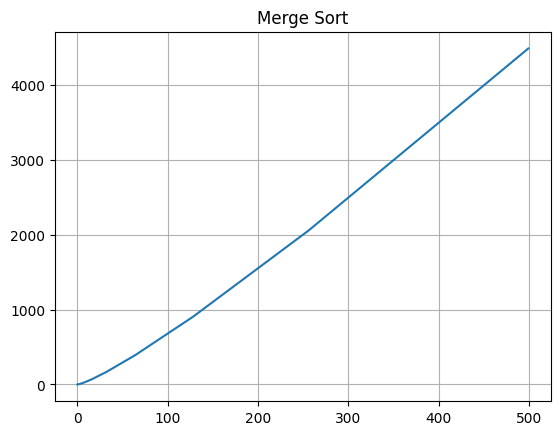

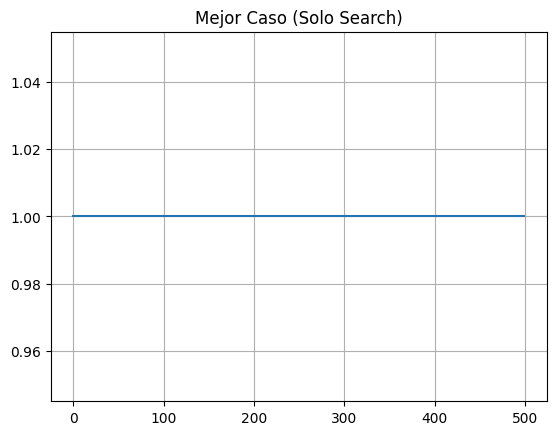

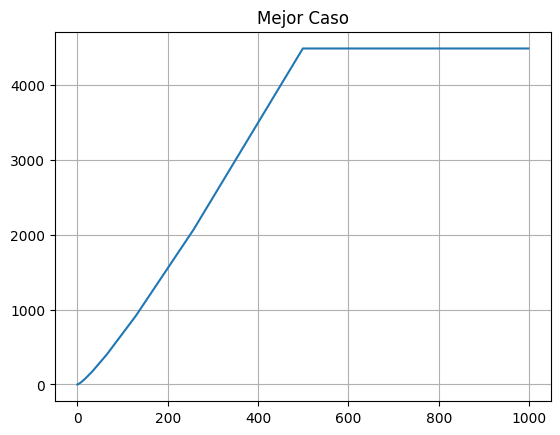

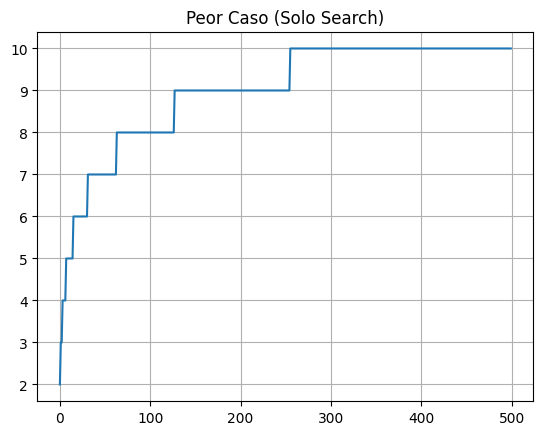

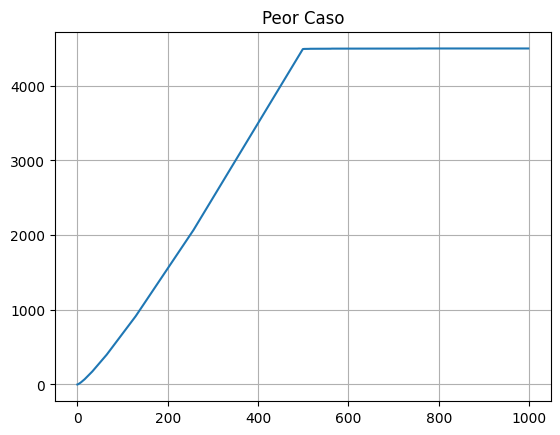

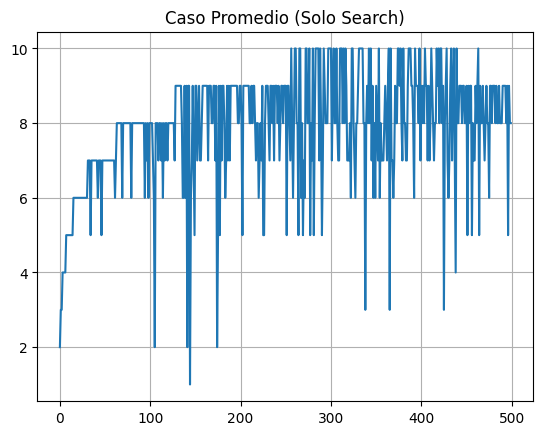

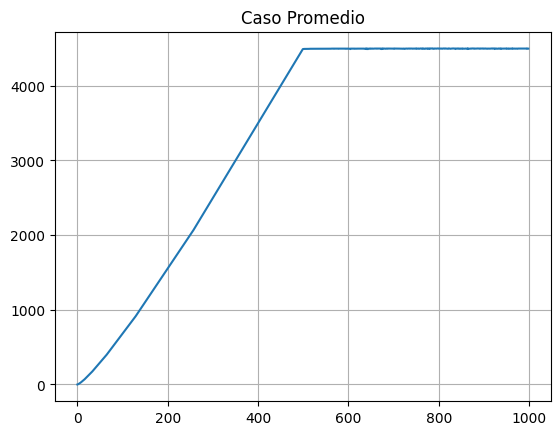

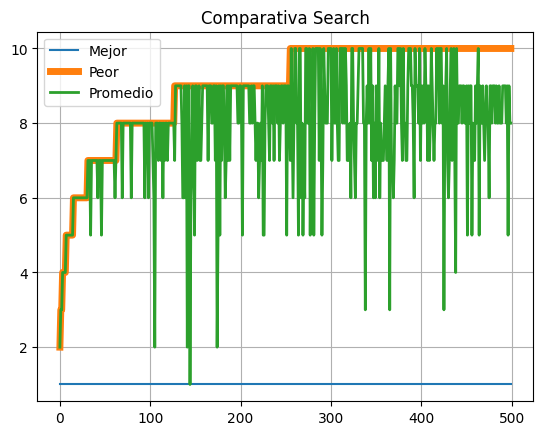

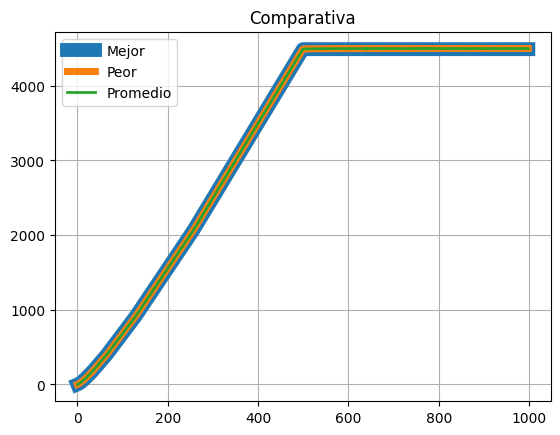

In [ ]:
MAX = 500

x = []
x_sort = []
x_search = []

y_mejor = []
y_peor = []
y_prom = []

y_sort = []

y_search_mejor = []
y_search_peor = []
y_search_prom = []

arr = create_node_arr(MAX, 1, 0, MAX)
aux = []
aux_aux = []

for i in range(MAX):
    aux.append(arr[i])
    time_sort = merge_sort(aux)
    y_sort.append(time_sort)
    x_sort.append(i)
x_last = i
y_last = time_sort

plt.title("Merge Sort")
plt.plot(x_sort, y_sort)
plt.grid(True)
plt.show()

for i in range(MAX):
    aux_aux.append(aux[i])
    x_search.append(i)
    if not aux_aux: continue
    sought_mejor = aux_aux[i // 2].value # <--------------------
    index, time_search_mejor = binary_search_recursive(aux_aux, sought_mejor, 0, len(aux_aux) - 1, 0)
    sought_peor = MAX * 2 # <--------------------
    index, time_search_peor = binary_search_recursive(aux_aux, sought_peor, 0, len(aux_aux) - 1, 0)
    sought_prom = random.randint(0, MAX) # <--------------------
    index, time_search_prom = binary_search_recursive(aux_aux, sought_prom, 0, len(aux_aux) - 1, 0)
    y_search_mejor.append(time_search_mejor)
    y_search_peor.append(time_search_peor)
    y_search_prom.append(time_search_prom)

x = x_sort[:]
y_mejor = y_sort[:]
y_peor = y_sort[:]
y_prom = y_sort[:]

for i in range(MAX):
    x.append(x_last + x_search[i])
    y_mejor.append(y_last + y_search_mejor[i])
    y_peor.append(y_last + y_search_peor[i])
    y_prom.append(y_last + y_search_prom[i])

casos = [{"titulo": "Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor}, {"titulo": "Mejor Caso", "datos_x": x, "datos_y": y_mejor},
        {"titulo": "Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor}, {"titulo": "Peor Caso", "datos_x": x, "datos_y": y_peor},
        {"titulo": "Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom}, {"titulo": "Caso Promedio", "datos_x": x, "datos_y": y_prom},]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(case["datos_x"], case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Comparativa Search")
plt.plot(x_search, y_search_mejor, label="Mejor")
plt.plot(x_search, y_search_peor, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Comparativa")
plt.plot(x, y_mejor, label="Mejor", linewidth=10)
plt.plot(x, y_peor, label="Peor", linewidth=5)
plt.plot(x, y_prom, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()